In [ ]:
import math
from scipy.stats import norm

# 🧠 Black-Scholes Formula Function
def black_scholes(S, K, T, r, sigma, option_type='call'):
    # d1 and d2 are key to the formula
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    if option_type == 'call':
        price = S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        price = K * math.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Option type must be either 'call' or 'put'.")

    return round(price, 2)

In [6]:
# 💡 Try your own values
S = float(input("Current Stock Price (S0): ₹ "))
K = float(input("Strike Price (K): ₹ "))
T = float(input("Time to Expiration (in years): "))
r = float(input("Annual Risk-Free Interest Rate (in decimal, e.g., 0.05): "))
sigma = float(input("Volatility (in decimal, e.g., 0.2): "))
option_type = input("Option Type ('call' or 'put'): ").strip().lower()

# 🧾 Output
price = black_scholes(S, K, T, r, sigma, option_type)
print(f"\n💸 The {option_type.upper()} option price is: ₹{price}")

ValueError: could not convert string to float: ''

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 📊 Plot how price changes with volatility
def plot_option_vs_volatility(S, K, T, r, option_type='call'):
    vol_range = np.linspace(0.01, 1.0, 100)  # 1% to 100% volatility
    prices = [black_scholes(S, K, T, r, vol, option_type) for vol in vol_range]

    plt.figure(figsize=(10, 5))
    plt.plot(vol_range, prices, label=f'{option_type.title()} Option Price', color='purple')
    plt.xlabel("Volatility (σ)")
    plt.ylabel("Option Price (₹)")
    plt.title(f"{option_type.title()} Option Price vs. Volatility")
    plt.grid(True)
    plt.legend()
    plt.show()

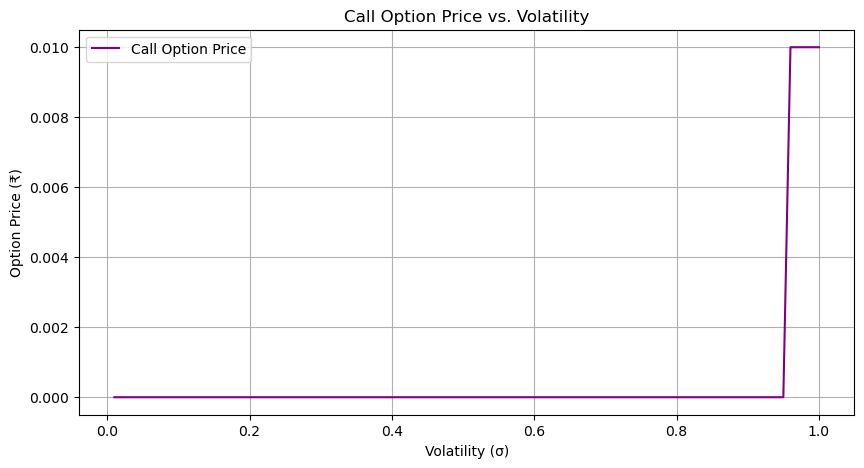

In [9]:
# 🧪 Example usage
plot_option_vs_volatility(S=100, K=150, T=0.019, r=0.05, option_type='call')